## Read the file 

1. Dataset Source: http://grouplens.org/datasets/movielens/100k/
2. By performing EDA and SQL, I can explore the data and have better understanding of user demographics, movie trends. I will ultilize matplotlib and seaborn to visualize data insights. 
3. This is particularly interesting because there are three different datasets to work with ( users, items, ratings). I would love to see what different data manipulation techniques I can use to organize my data as a preparation for 6001 - movie recomender system. 

In [1]:
%pylab inline
%load_ext sql

import pandas as pd
from scipy import stats
import numpy as np
import yaml
import seaborn as sns
import statsmodels.formula.api as smf


Populating the interactive namespace from numpy and matplotlib


/Users/Charlotte/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/Charlotte/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
!pip install ipython-sql

In [3]:
# https://www.analyticsvidhya.com/blog/2016/06/quick-guide-build-recommendation-engine-python/

In [4]:
#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
 encoding='latin-1')

In [5]:
users.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [6]:
#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
 encoding='latin-1')


In [7]:
ratings.head(2)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [8]:
#Reading items file:
i_cols = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names = i_cols,
 encoding='latin-1')

In [9]:
items.head(1)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

## 1. Collect Good Data According to the Purpose of the Analysis
## 2. Write Basic SQL
## 3. Demonstrate Python Programming Skills for Statistical Data Analysis
## 4. Demonstrate Exploratory Data Analysis techniques
## 5. Calculate Probabilities
## 6. Identify and Manipulate Random Variables / Distributions

In [11]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///ml-100k.db')
conn = engine.connect()
# ratings.to_sql('ratings', conn)
# users.to_sql('users', conn)
# items.to_sql('items', conn)



In [12]:
%sql sqlite:///ml-100k.db

'Connected: None@ml-100k.db'

In [13]:
ratings.tail()

,user_id,movie_id,rating,unix_timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


# SQL

## Number of ratings per user in descending order

In [14]:
%%sql 
SELECT user_id , count(user_id) as counts
FROM ratings 
group by user_id 
order by  count(user_id) desc 
Limit 10

Done.


user_id,counts
405,737
655,685
13,636
450,540
276,518
416,493
537,490
303,484
234,480
393,448


## Number of ratings per user in ascending order 

In [15]:
# This means each user rates at least 20 movies and at most 1682 movies 

## Different age groups users

In [16]:
%%sql

SELECT age, count (*) as counts 
From ( 
select case 
when age between 0 and 10 then 0
when age between 10 and 20 then 1
when age between 20 and 30 then 2
when age between 30 and 40 then 3 
when age between 40 and 50 then 4
when age between 50 and 60 then 5 
when age between 60 and 70 then 6
when age between 70 and 80 then 7    
end as age
from users ) group by age

Done.


age,counts
0,2
1,107
2,339
3,223
4,167
5,83
6,21
7,1


In [17]:
# most users are in 20s and 30s - this can affect their movie selections 

## User by occupations

In [18]:
%%sql 
SELECT occupation , count(occupation) as counts
FROM users 
group by occupation
order by  count(user_id) desc

Done.


occupation,counts
student,196
other,105
educator,95
administrator,79
engineer,67
programmer,66
librarian,51
writer,45
executive,32
scientist,31


In [19]:
len(users.occupation.unique())

21

In [20]:
#There are 21 different occupations
# Most users are students
# There are 31 scientist and 66 programmers !!! 

## Average rating of active raters

In [21]:
%%sql

SELECT user_id, count(user_id) as counts , round(avg(rating),2) as mean_rating
FROM ratings
group by user_id
order by count(rating) desc
LIMIT 5

Done.


user_id,counts,mean_rating
405,737,1.83
655,685,2.91
13,636,3.1
450,540,3.86
276,518,3.47


 I was checking to see if there are rating bias for users who frequently rate movies. Since the average isn't polarized, I assume they give honest reviews.

In [22]:
ratings.head(2)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742


## Ratings per user in order

In [23]:
%%sql

Select user_id, movie_id, rating 
from ratings
order by user_id
LIMIT 10

Done.


user_id,movie_id,rating
1,61,4
1,189,3
1,33,4
1,160,4
1,20,4
1,202,5
1,171,5
1,265,4
1,155,2
1,117,3


# EDA 

In [24]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [25]:
# There are 943 users , and mean age is 34 years old. The oldest user is 73 years old and the youngest is 7 years old.

In [26]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [27]:
# There are 10k ratings over 1682 movies. The lowest rating is 1 and highest is 5. The mean is 3.5 and the median is 4, so the distribution is skewed to the left. 
# It means that in general, people leave more positive ratings. 

In [28]:
items.describe()

/Users/Charlotte/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
items.sum()

movie_id              1415403.0
video_release_date          0.0
unknown                     2.0
Action                    251.0
Adventure                 135.0
Animation                  42.0
Children's                122.0
Comedy                    505.0
Crime                     109.0
Documentary                50.0
Drama                     725.0
Fantasy                    22.0
Film-Noir                  24.0
Horror                     92.0
Musical                    56.0
Mystery                    61.0
Romance                   247.0
Sci-Fi                    101.0
Thriller                  251.0
War                        71.0
Western                    27.0
dtype: float64

In [30]:
# There are 943 users and 1682 movies 
# There are more comedy and drama than other types of movies. There are the least number of fantasy and film-noir. 

## Demographic of Users

## User by age range

In [31]:
#creating new column of age range for graphing later 
users['age_range'] = ['Kids' if x <= 10  else 'Teens' if x <= 20 else 'Tweens'if x <= 30 else 'Thirties' \
                      if x <= 40 else 'Fourties'if x <= 50 else 'Fifties' if x <= 60  \
                      else 'Sixties' if x <= 70 else 'Seventies' for x in users['age']]
# users['age_range'] = ['Kid' if x <= 2.8  else 'Average GPA' if x >= 3.200 else 'Good GPA' for x in df['gpa']]
users.head()

,user_id,age,sex,occupation,zip_code,age_range
0,1,24,M,technician,85711,Tweens
1,2,53,F,other,94043,Fifties
2,3,23,M,writer,32067,Tweens
3,4,24,M,technician,43537,Tweens
4,5,33,F,other,15213,Thirties


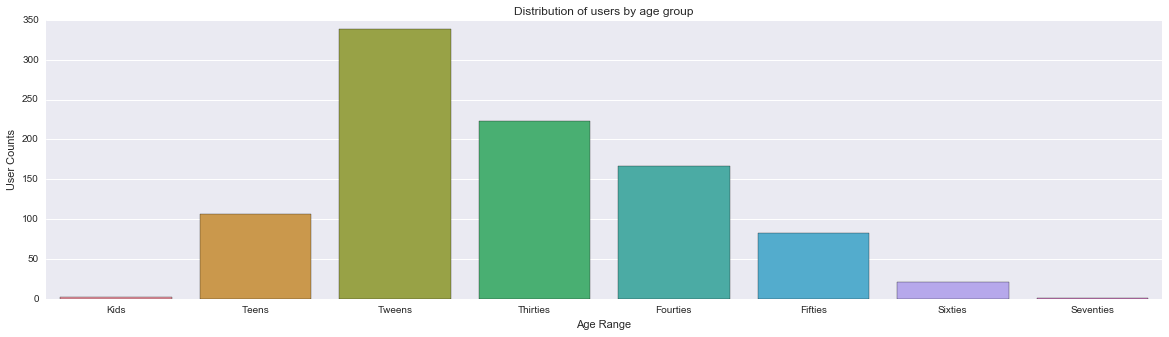

In [32]:
plt.figure(figsize = (20,5))
sns.countplot('age_range', data = users, order= ['Kids','Teens','Tweens','Thirties','Fourties','Fifties','Sixties','Seventies']);
plt.title('Distribution of users by age group')
plt.xlabel('Age Range')
plt.ylabel('User Counts')

## User by genders

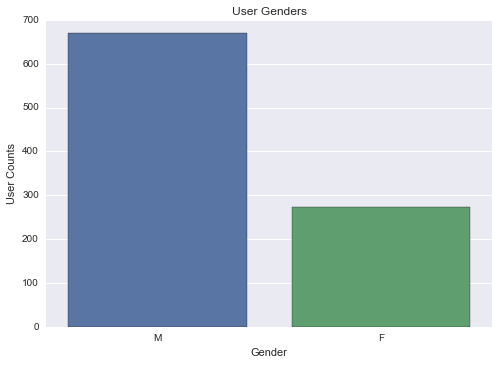

In [33]:
sns.countplot(x ='sex', data = users)
# sns.countplot(y='response', hue='age_group', data=df, palette="Greens_d")
plt.title('User Genders')
plt.xlabel('Gender')
plt.ylabel('User Counts')

In [34]:
# There are more than twice as many male users as females

# User by age and gender

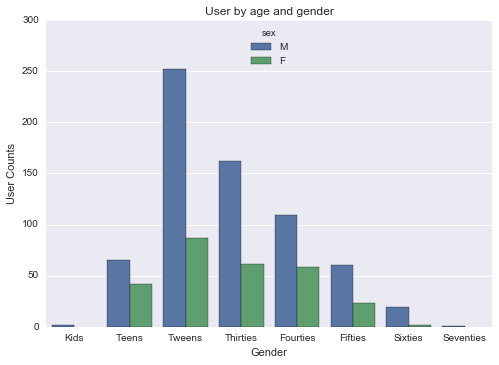

In [35]:
sns.countplot(x ='age_range', hue = 'sex', data = users, order= ['Kids','Teens','Tweens','Thirties','Fourties','Fifties','Sixties','Seventies']);
plt.title('User by age and gender')
plt.xlabel('Gender')
plt.ylabel('User Counts')

In [36]:
# There are significantly more boys teenagers than girls and other age demographics. 

## Movie Genres Distribution 

In [37]:
dt_index = range(1)
movies_count = pd.DataFrame({'unknown': [items['unknown'].sum()] , 'Action': [items['Action'].sum()], 'Adventure': [items['Adventure'].sum()],
 'Adventure': [items['Adventure'].sum()], 'Children\'s': [items['Children\'s'].sum()], 'Comedy': [items['Comedy'].sum()], 'Crime': [items['Crime'].sum()], 'Documentary': [items['Documentary'].sum()], 'Drama': [items['Drama'].sum()], 'Fantasy': [items['Fantasy'].sum()],
 'Film-Noir': [items['Film-Noir'].sum()], 'Horror': [items['Horror'].sum()], 'Musical': [items['Musical'].sum()], 'Mystery': [items['Mystery'].sum()], 'Romance': [items['Romance'].sum()], 'Sci-Fi': [items['Sci-Fi'].sum()], 'Thriller': [items['unknown'].sum()], 'War': [items['unknown'].sum()], 'Western': [items['Thriller'].sum()]}, index = dt_index )
movies_count.head()

,Action,Adventure,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
0,251,135,122,505,109,50,725,22,24,92,56,61,247,101,2,2,251,2


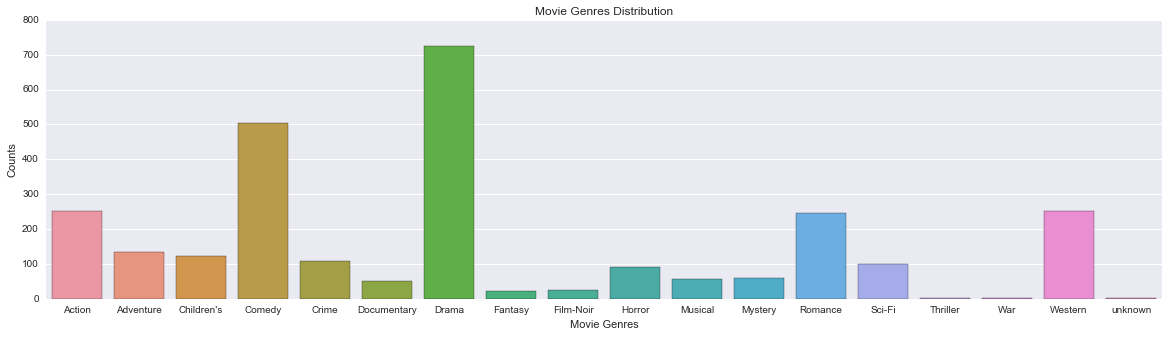

In [38]:
plt.figure(figsize = (20,5))
sns.barplot(data=movies_count)
plt.title('Movie Genres Distribution')
plt.xlabel('Movie Genres')
plt.ylabel('Counts')

In [39]:
# There are significantly more dramma and comedy movies than other types of movies

# Statistics/Random Sampling

## Mean of Age of Female / Male 

In [40]:
users.groupby(['sex'])['age'].mean()

sex
F    33.813187
M    34.149254
Name: age, dtype: float64

In [41]:
# Average age of both genders are about the same 

In [42]:
# movie_ratings = pd.merge(items , ratings , on = 'movie_id', how = 'left')
# movie_ratings.head(1)

In [43]:
users.groupby(['occupation'])['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [44]:
users.groupby(['occupation'],sort = True)['age'].std()

occupation
administrator    11.123397
artist            8.668116
doctor           12.501428
educator         10.413264
engineer         11.199236
entertainment    10.056052
executive        10.608075
healthcare       11.313524
homemaker        10.737119
lawyer           10.830303
librarian        11.023611
marketing         9.474500
none             13.757826
other            10.738227
programmer        9.624512
retired           5.757461
salesman         14.079859
scientist         7.392964
student           5.284081
technician        9.867210
writer           11.423306
Name: age, dtype: float64

# Probability

### You randomly pick 20 movies. What's the probability that 5 of them are Drama movies ?

$$ f_X(x) = \frac{\binom{M}{x} \binom{N - M}{n - x}}{\binom{N}{n}} \text{, for } x = 0, 1, \dots, n $$


In [45]:
from math import factorial #http://www.josechristian.com/programming/combinations-and-factorials-python/
def combination(n,k):
    numerator=factorial(n)
    denominator=(factorial(k)*factorial(n-k))
    answer=numerator/denominator
    return answer

In [46]:
drama = items['Drama'].sum()
total_movies = items.movie_id.count()
x = 5 


In [47]:
drama_probability = round((combination(drama,x) * combination(total_movies - drama,15) * 100.0 /combination(total_movies,20)),2)
drama_probability

4.84

### One night, there are 300 users are online. What is the probability that the 100th users is the 30th female ?

$$ f_X(x) = \binom{x - 1}{r - 1} p^r (1 - p)^{x - r} \text{, for } x = r, r + 1, \dots $$


In [48]:
trials = 100
success = 30 
sucess_prob = (users['sex'] == 'F').sum() / users['sex'].count()

In [49]:
female_ngb_prob = round((combination(trials - 1, success - 1 )* (sucess_prob ** success) * (1 - sucess_prob) ** ( trials - success) * 100.0),2)
female_ngb_prob

2.54

# Identify and Manipulate Random Variables / Distributions

In [50]:
users.head()

,user_id,age,sex,occupation,zip_code,age_range
0,1,24,M,technician,85711,Tweens
1,2,53,F,other,94043,Fifties
2,3,23,M,writer,32067,Tweens
3,4,24,M,technician,43537,Tweens
4,5,33,F,other,15213,Thirties


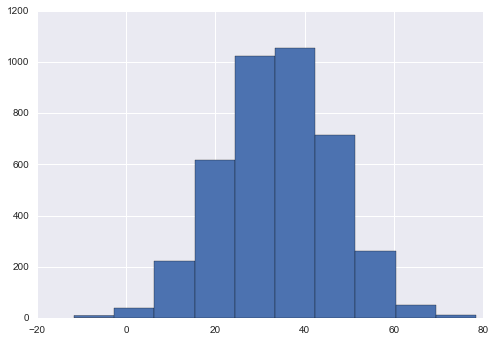

In [51]:
users_age_mean, users_age_std = users['age'].mean(),users['age'].std()
users_age_occupation_dist = stats.norm(users_age_mean, users_age_std)
users_sample = users_age_occupation_dist.rvs(4000)
hist(users_sample);

In [52]:
# As the number of data points gets bigger, graph becomes normally distributed. 

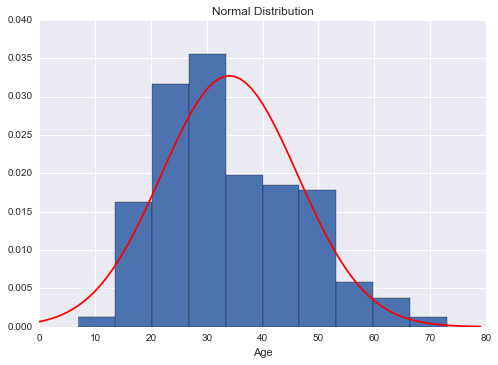

In [53]:
user_age = stats.norm(users['age'].mean(), users['age'].std())
x = arange(80)
user_age_y = user_age.pdf(x)
hist(users['age'],normed = True)
plot(x, user_age_y, 'r');
plt.title('Normal Distribution')
plt.xlabel('Age')

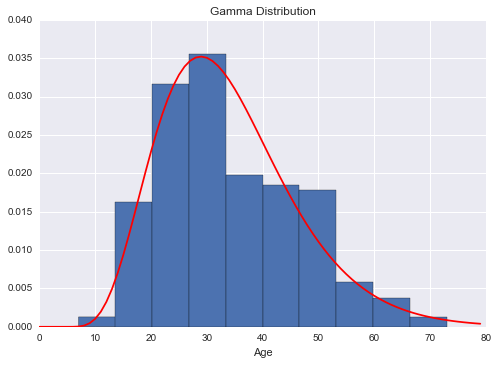

In [54]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(users['age'])
fitted_gamma = stats.gamma(fit_alpha, fit_loc, fit_beta)
x = arange(80)
fitted_gamma_y = fitted_gamma.pdf(x)
hist(users['age'],normed = True)
plot(x, fitted_gamma_y, 'r'); 
plt.title('Gamma Distribution')
plt.xlabel('Age')

In [55]:
# Gamma Distribution clearly works better for user ages instead of normal distribution 

# Hypothesis Testing

## Since we have higher male demographic and high population of drama movies, I assume male has different rating score for drama movies comparing to female's. 

In [56]:
drama_movies = items.ix[items['Drama'] > 0 ]

In [57]:
drama_movies_ratings = pd.merge(drama_movies, ratings, how='inner', on=['movie_id'])
len(drama_movies_ratings)

39895

In [58]:
female = users.ix[users['sex'] == 'F']
female_ratings = pd.merge(drama_movies_ratings, female, how='inner', on=['user_id'])
female_ratings['rating'].mean()

3.6622456395348837

In [59]:
male = users.ix[users['sex'] == 'M']
male_ratings = pd.merge(drama_movies_ratings, male, how='inner', on=['user_id'])
male_ratings['rating'].mean()

3.6969571087340327

### Ho : $\mu$ female ratings = $\mu$ male ratings for drama movies 
### Ha: $\mu$ female ratings  != $\mu$ male ratings for drama movies 

In [60]:
stats.ttest_ind_from_stats(mean1 = female_ratings['rating'].mean() , std1 = female_ratings['rating'].std() , nobs1 = len(female_ratings) , mean2 = male_ratings['rating'].mean(), std2 = male_ratings['rating'].std() , nobs2 = len(male_ratings))

Ttest_indResult(statistic=-2.8720161323181079, pvalue=0.004080770096148708)

Since p < 0.05, we reject the null hypothesis. We have enough evidence to say that female and male ratings dont equal each other in regarding to drama movies. 

# Linear Regression

## Try to predict user Rating based on Sex and Age

In [61]:
users.head(2)

,user_id,age,sex,occupation,zip_code,age_range
0,1,24,M,technician,85711,Tweens
1,2,53,F,other,94043,Fifties


In [62]:
ratings.head(2)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742


### Average Rating Per User

In [63]:
a = users.drop(['occupation','zip_code','age_range'], axis = 1)
a.sex = a.sex.map(lambda o: 1 if o == 'M' else 0) # 1: Male 0:Female 
b = ratings.copy()

In [64]:
'''Average Rating per user '''

b = b.groupby('user_id')['rating'].mean()
b = pd.DataFrame(b)
b['user_id'] = range(1,944)
b.head(2)

,rating,user_id
user_id,,
1,3.610294,1
2,3.709677,2


In [65]:
'''Merge 2 tables '''
ratings_users = pd.merge(a,b, how='outer', on=['user_id'])
ratings_users.head(2)

,user_id,age,sex,rating
0,1,24,1,3.610294
1,2,53,0,3.709677


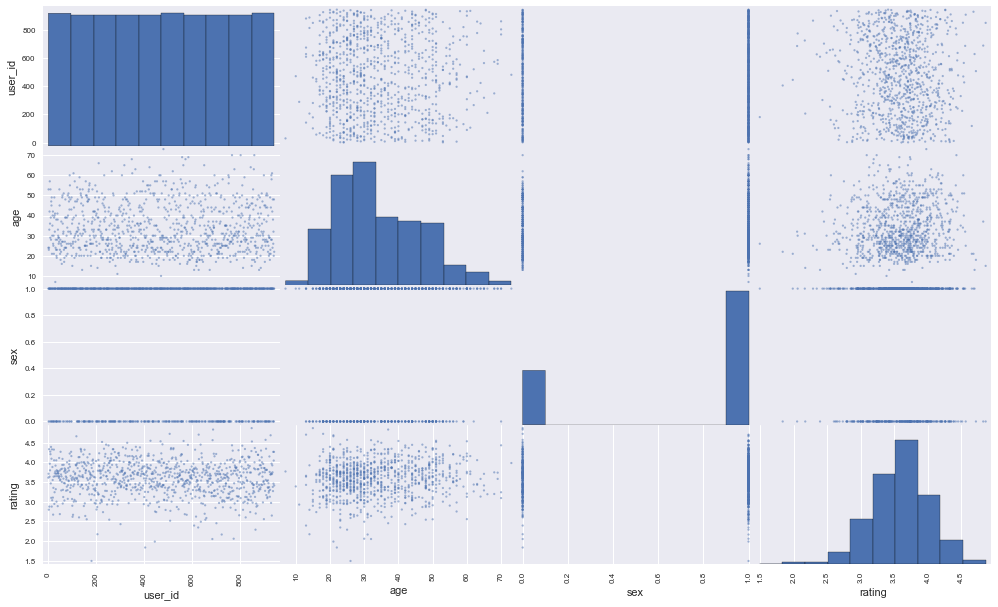

In [66]:
pd.scatter_matrix(ratings_users, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [67]:
# There are no relationship among the variables  # age

In [68]:
rating_pred = smf.ols("rating ~ age + sex ", data= ratings_users).fit()
rating_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.084
Date:                Wed, 19 Oct 2016   Prob (F-statistic):             0.0171
Time:                        18:44:08   Log-Likelihood:                -570.44
No. Observations:                 943   AIC:                             1147.
Df Residuals:                     940   BIC:                             1161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4726      0.048     71.947      0.000       3.378       3.567
age            0.0034      0.001      2.858      0.004       0.001       0.006
sex            0.0003      0.032      0.009      0.993      -0.062       0.063
==============================================================================
Omnibus:                       43.895   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.058
Skew:                          -0.427   Prob(JB):                     9.09e-14
Kurtosis:                       3.894   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared is 0.009 means this is not a good predicting model.

F-stat is 4.084 and Prob(Fstat) = 0.0171, we reject the null. There is enough evidence to claim that at least one variable is a useful predictor of this model. 
Age has p value (0.004) which is less than 0.05, we reject the null since we have enough evidence to say that age is a good predictor. Sex has a high p value, which indicates that it is not a good predictor for rating.
As age and sex increase by one unit, rating increases by 0.003 and 0.0002 respectively by holding other variable constant. 

In [69]:
rating_pred_age = smf.ols("rating ~ age ", data= ratings_users).fit()
rating_pred_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.177
Date:                Wed, 19 Oct 2016   Prob (F-statistic):            0.00434
Time:                        18:44:08   Log-Likelihood:                -570.44
No. Observations:                 943   AIC:                             1145.
Df Residuals:                     941   BIC:                             1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4728      0.043     81.013      0.000       3.389       3.557
age            0.0034      0.001      2.859      0.004       0.001       0.006
==============================================================================
Omnibus:                       43.903   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.065
Skew:                          -0.427   Prob(JB):                     9.06e-14
Kurtosis:                       3.894   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 I did stepwise regression by eliminating sex variable, however the R squared didn't increase much. 
P value of age is still less than 0.05, means it is a good predictor. If age increases by one unit, rating will increase by 0.004.

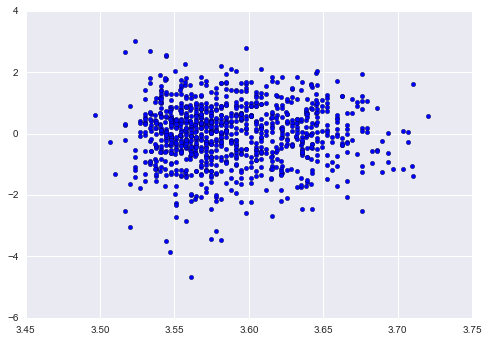

In [70]:
plt.scatter(rating_pred.fittedvalues, rating_pred.resid_pearson)

In [71]:
# There is no linear relationship between two variables 

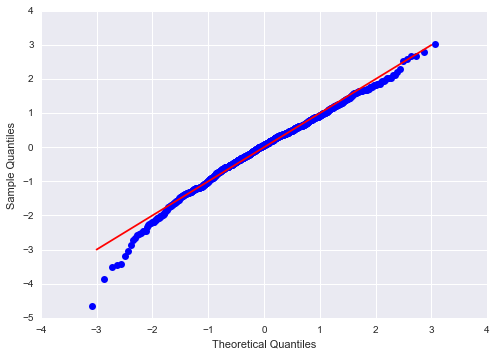

In [72]:
from statsmodels.graphics.gofplots import qqplot
sres_3 = rating_pred.resid_pearson
qqplot(sres_3)
q = linspace(-3, 3)
plot(q, q, color='r')
show()

In [73]:
# It doesnt appear to be normal

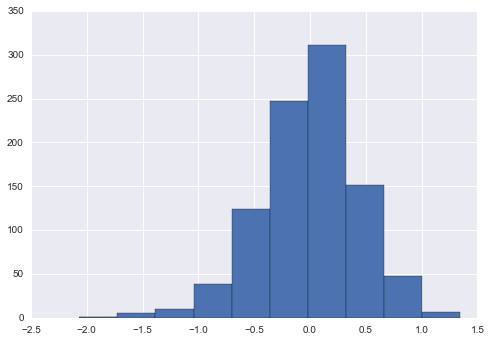

In [74]:
hist(rating_pred.resid);

In [75]:
# We have a slighly left skewed normal distribution 

In [76]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(rating_pred.resid, rating_pred.model.exog)

(5.7760399733681327,
 0.05568636326639801,
 2.8965742482787875,
 0.055705016769448883)

Since p-value is greater than 0.05, we fail reject the null hypothesis that the residuals have constant variance

# GLM

In [77]:
from statsmodels.genmod.families import family

In [78]:
ratings_users.head(2)

,user_id,age,sex,rating
0,1,24,1,3.610294
1,2,53,0,3.709677


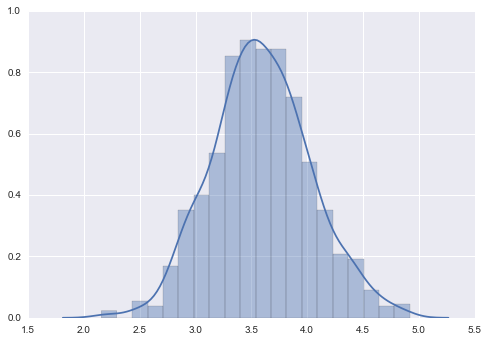

In [79]:
users_rating_mean, users_rating_std = ratings_users['rating'].mean(),ratings_users['rating'].std()
users_dist = stats.norm(users_rating_mean, users_rating_std)
users_sample = users_dist.rvs(943)
sns.distplot(users_sample, bins = 20);

In [80]:
model1 = smf.ols("rating ~ age + sex ", data= ratings_users).fit()
model1.params

Intercept    3.472582
age          0.003389
sex          0.000286
dtype: float64

In [81]:
glm_norm = smf.glm("rating ~ age + sex ", data= ratings_users).fit()
glm_norm.params

Intercept    3.472582
age          0.003389
sex          0.000286
dtype: float64

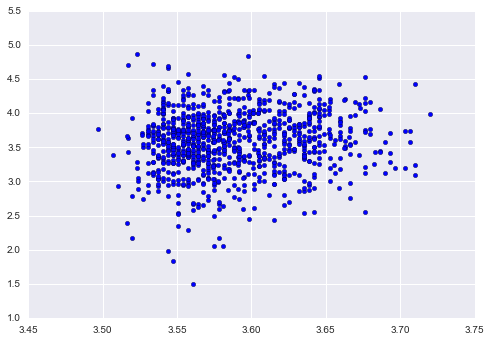

In [82]:
plt.scatter(model1.fittedvalues, ratings_users.rating)

In [83]:
# There are no linear relationship among the variables.

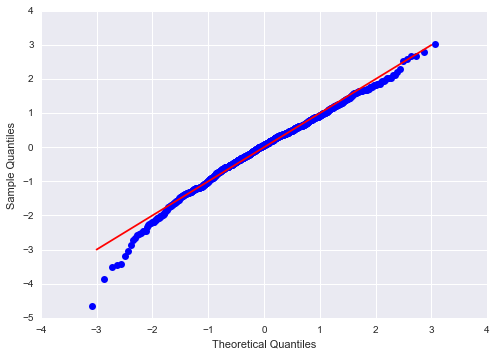

In [84]:
from statsmodels.graphics.gofplots import qqplot
sres_3 = model1.resid_pearson
qqplot(sres_3)
q = linspace(-3, 3)
plot(q, q, color='r')
show()

In [85]:
# This inidicates the residual is not normal

In [86]:
# Since my distribution is somewhat normal, I use GLM Linear Regression, which has the same result with OLS. 

## I predict this model is meaningless, but for the merit of demonstrating logistic regression, I will try to predict gender by age and rating.

In [112]:
mle_logit = smf.logit("sex ~ age + rating ", data= ratings_users).fit()
mle_logit.summary()

Optimization terminated successfully.
         Current function value: 0.601626
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  943
Model:                          Logit   Df Residuals:                      940
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:               0.0001304
Time:                        18:50:24   Log-Likelihood:                -567.33
converged:                       True   LL-Null:                       -567.41
                                        LLR p-value:                    0.9287
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8156      0.601      1.356      0.175      -0.363       1.994
age            0.0023      0.006      0.382      0.703      -0.009       0.014
rating         0.0014      0.162      0.009      0.993      -0.316       0.319
==============================================================================
"""

In [109]:
mle_logit.params

Optimization terminated successfully.
         Current function value: 0.601626
         Iterations 5


Intercept    0.815596
age          0.002266
rating       0.001448
dtype: float64

In [110]:
smf.glm("sex ~ age + rating ", data= ratings_users, family=family.Binomial()).fit().params

Intercept    0.815596
age          0.002266
rating       0.001448
dtype: float64

In [111]:
# We see that the logistic regression using logit generates the same params with using GLM ( Binomial Family )

Gender has positive relationship with age and rating. 

In [116]:
age = 30
rating = 5
y = 0.002266 * age + 0.0014 * rating
def logit_func(x):
    a = (np.exp(x) / ( 1 + np.exp(x)) )
    return a 

logit_func(y)

0.51873622290132737

In other words, this user has a 51.8% chance of being a male.

# Time Series

## Ratings are from Oct 1997 til April 1998
Suspect more ratings during December til April since more users as time goes on.

In [87]:
ratings.head(2)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [88]:
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit='s')
ratings.head(2)

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22


In [89]:
ratings['day'] =  pd.DatetimeIndex(ratings['date']).date
ratings['month'] =  pd.DatetimeIndex(ratings['date']).month
ratings['year'] =  pd.DatetimeIndex(ratings['date']).year

In [90]:
movie_rating_perday = ratings.groupby('day')['rating'].count()
movie_rating_perday = pd.DataFrame(movie_rating_perday)
movie_rating_perday.head(2)

,rating
day,
1997-09-20,915
1997-09-21,825


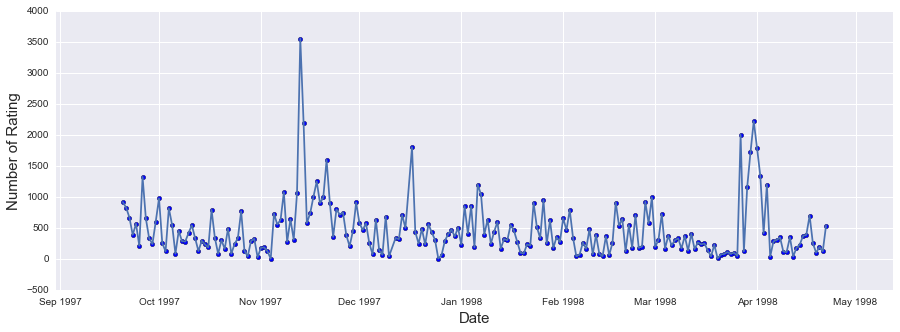

In [91]:
plt.figure(figsize=(15,5))
plt.scatter(movie_rating_perday.index , movie_rating_perday.rating)
plt.plot(movie_rating_perday.index , movie_rating_perday.rating)
plt.xlabel ('Date',fontsize = 15)
plt.ylabel ('Number of Rating',fontsize = 15 )

We see that number of rating doesnt go according to the time as we predicted. In general, there are around 300-1000 ratings per day. 

There is a high peak in mid November and a moderate peak in mid December, which are probably because of the holiday. 
There is a moderate peak during April, which maybe due to spring break vacation. 

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels import datasets
from statsmodels.tsa.arima_model import ARMA

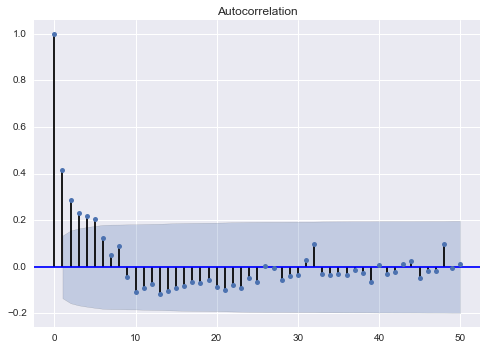

In [93]:
plot_acf(movie_rating_perday, lags=50);

There is a slowly downward trend so the series may not be stationary. 

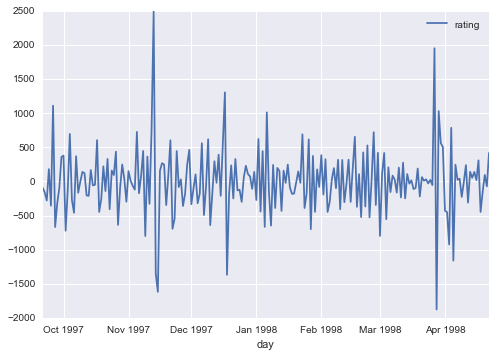

In [94]:
diff = movie_rating_perday.diff().dropna()
diff.plot();

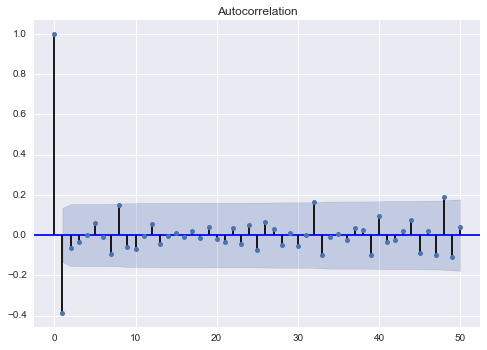

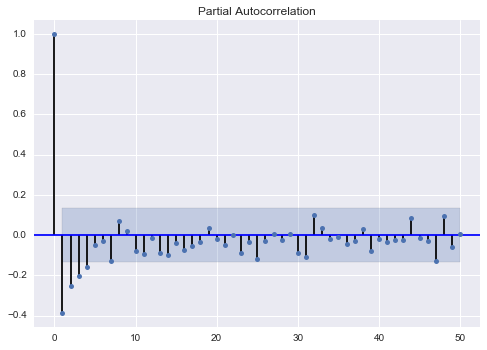

In [95]:
plot_acf(diff, lags=50 );
plot_pacf(diff, lags=50);

In [96]:
movie_rating_perday['rating']= movie_rating_perday.rating.astype(float)

In [97]:
arma_mod_4 = ARMA(diff, (4,1)).fit()
arma_mod_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 3187.4196 
Dependent Variable: rating           Log-Likelihood:      -1575.0   
Date:               2016-10-19 18:44 Scale:               1.0000    
No. Observations:   212              Method:              css-mle   
Df Model:           6                Sample:              09-21-1997
Df Residuals:       206                                   04-22-1998
Converged:          1.0000           S.D. of innovations: 403.806   
AIC:                3163.9235        HQIC:                3173.420  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           -0.8034    1.0592   -0.7585  0.4490  -2.8794   1.2726
ar.L1.rating     0.3434    0.0686    5.0081  0.0000   0.2090   0.4778
ar.L2.rating     0.0971    0.0721    1.3464  0.1796  -0.0443   0.2385
ar.L3.rating     0.0592    0.0720    0.8218  0.4122  -0.0820   0.2004
ar.L4.rating     0.0903    0.0683    1.3213  0.1879  -0.0436   0.2243
ma.L1.rating    -1.0000    0.0128  -78.1708  0.0000  -1.0251  -0.9749
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.3009            -0.0000           1.3009            -0.0000
AR.2           -2.1314            -0.0000           2.1314            -0.5000
AR.3            0.0875            -1.9965           1.9984            -0.2430
AR.4            0.0875             1.9965           1.9984             0.2430
MA.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

We have quite large negative log likelihood -1575.0, and high BIC and AIC : 3187.4196,3163.9235 . 
The p value of MA(1) is significant, so we keep it. I may want to increase MA to see how p value changes.
The p value of  AR(2) AR(4) AR(3) are insignificant, so I will reduce AR.
Since it is not perfect, we want to test other model.

In [98]:
arma_mod = ARMA(diff, (3,2)).fit()
print(arma_mod.params)

const          -7.488705e-01
ar.L1.rating   -6.372219e-01
ar.L2.rating    5.006653e-01
ar.L3.rating    1.379682e-01
ma.L1.rating   -1.870844e-07
ma.L2.rating   -9.999998e-01
dtype: float64


/Users/Charlotte/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Charlotte/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [99]:
arma_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 3190.9135 
Dependent Variable: rating           Log-Likelihood:      -1576.7   
Date:               2016-10-19 18:44 Scale:               1.0000    
No. Observations:   212              Method:              css-mle   
Df Model:           6                Sample:              09-21-1997
Df Residuals:       206                                   04-22-1998
Converged:          0.0000           S.D. of innovations: 406.833   
AIC:                3167.4174        HQIC:                3176.914  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           -0.7489    0.8921   -0.8395  0.4022  -2.4973   0.9996
ar.L1.rating    -0.6372    0.0670   -9.5098  0.0000  -0.7686  -0.5059
ar.L2.rating     0.5007    0.0730    6.8568  0.0000   0.3576   0.6438
ar.L3.rating     0.1380    0.0662    2.0846  0.0383   0.0082   0.2677
ma.L1.rating    -0.0000    0.0137   -0.0000  1.0000  -0.0269   0.0269
ma.L2.rating    -1.0000    0.0137  -72.7626  0.0000  -1.0269  -0.9731
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.0001             0.0000           1.0001             0.5000
AR.2            1.6815             0.0000           1.6815             0.0000
AR.3           -4.3103             0.0000           4.3103             0.5000
MA.1            1.0000             0.0000           1.0000             0.0000
MA.2           -1.0000             0.0000           1.0000             0.5000
====================================================================

"""

We have quite large negative log likelihood -1576.7, and high BIC and AIC : 3190.9135,3167.4174 . 
The p value of MA(1) is very high, but leads to low p value for MA(2), so we keep it.
The p value of  AR(1) AR(2) AR(3) are significant. 
Since it is not perfect, we want to test other model.

In [100]:
arma_mod_2= ARMA(diff, (2,2)).fit()
print(arma_mod_2.params)

const          -0.812011
ar.L1.rating    0.907685
ar.L2.rating   -0.078999
ma.L1.rating   -1.568085
ma.L2.rating    0.568085
dtype: float64


In [101]:
arma_mod_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 3182.3788 
Dependent Variable: rating           Log-Likelihood:      -1575.1   
Date:               2016-10-19 18:44 Scale:               1.0000    
No. Observations:   212              Method:              css-mle   
Df Model:           5                Sample:              09-21-1997
Df Residuals:       207                                   04-22-1998
Converged:          1.0000           S.D. of innovations: 404.176   
AIC:                3162.2392        HQIC:                3170.379  
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            -0.8120    1.0900  -0.7450  0.4571  -2.9484   1.3244
ar.L1.rating      0.9077    0.1894   4.7922  0.0000   0.5365   1.2789
ar.L2.rating     -0.0790    0.1143  -0.6909  0.4904  -0.3031   0.1451
ma.L1.rating     -1.5681    0.1733  -9.0488  0.0000  -1.9077  -1.2284
ma.L2.rating      0.5681    0.1730   3.2842  0.0012   0.2291   0.9071
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.2343             0.0000           1.2343             0.0000
AR.2           10.2556             0.0000          10.2556             0.0000
MA.1            1.0000             0.0000           1.0000             0.0000
MA.2            1.7603             0.0000           1.7603             0.0000
====================================================================

"""

The log likelihood is -1575.1, which barely improves. and BIC and AIC : 3182.,3162. , which sligtly decreases. 
The p value of MA(1) and MA(2), are significant. 
The p value of  AR(1) is low but AR(2) is insignificant.
Since it is not perfect, we want to test other model.

In [102]:
arma_mod_3 = ARMA(diff, (1,2)).fit()
print(arma_mod_3.params)

const          -0.804389
ar.L1.rating    0.778745
ma.L1.rating   -1.459263
ma.L2.rating    0.459263
dtype: float64


In [103]:
arma_mod_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 3177.4845 
Dependent Variable: rating           Log-Likelihood:      -1575.4   
Date:               2016-10-19 18:44 Scale:               1.0000    
No. Observations:   212              Method:              css-mle   
Df Model:           4                Sample:              09-21-1997
Df Residuals:       208                                   04-22-1998
Converged:          1.0000           S.D. of innovations: 404.561   
AIC:                3160.7016        HQIC:                3167.485  
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           -0.8044    1.0631   -0.7566  0.4501  -2.8881   1.2793
ar.L1.rating     0.7787    0.0934    8.3374  0.0000   0.5957   0.9618
ma.L1.rating    -1.4593    0.1324  -11.0208  0.0000  -1.7188  -1.1997
ma.L2.rating     0.4593    0.1319    3.4813  0.0006   0.2007   0.7178
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.2841             0.0000           1.2841             0.0000
MA.1            1.0000             0.0000           1.0000             0.0000
MA.2            2.1774             0.0000           2.1774             0.0000
====================================================================

"""

Log likelihood barely changes but BIC, and AIC are lower comparing previous models. We also have generally significant p values for all MA and AR. Therefore, comparing to the other two model, I would prefer this one better